# Материалы для статьи

In [66]:
# Подключение модулей
import pandas as pd, numpy as np
import FireAnalysis as fr, FireAnalysis2 as fr2 # вспомогательные функции
import pyodbc as sqlMS # связь с Access
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Создание связи с БД "Пожары"
connStr = (r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};" r"DBQ=d:\FR\FR.accdb;")
conn = sqlMS.connect(connStr) # создать соединение с БД
cursor = conn.cursor()

# Условия развития пожара - добавить условия развития пожаров
strSQL = f'''
SELECT [F83]+[F84]+[F85]+[F86]+[F87] AS T, [F91]+[F92]+[F93] AS Stv, [F5]+TimeSerial([F61],[F62],0) AS T1, [F71]+TimeSerial([F159],[F160],0) AS T2
FROM FR2017
WHERE ((([F83]+[F84]+[F85]+[F86]+[F87])>0) AND (([F91]+[F92]+[F93])>0) AND ((FR2017.F1)=1146));
'''
# Запрос - Пожары Московская область
df = pd.read_sql(strSQL, conn)
df

In [93]:
# Интервал в минутах - (df.T2-df.T1).dt.seconds/60
# df.to_pickle('pkl/Article.pkl')
df = pd.read_pickle('pkl/Article.pkl') 

In [94]:
df = df.loc[(df['D'] > 1) & (df['T'] > 0) & (df['Stv'] > 0)]

# Интервалы MinMax
df['dT'] = (df['T'] - df['T'].min())/(df['T'].max() - df['T'].min())
df['dStv'] = (df['Stv'] - df['Stv'].min())/(df['Stv'].max() - df['Stv'].min())
df['dD'] = (df['D'] - df['D'].min())/(df['D'].max() - df['D'].min())
df['S'] = df['dT'] + df['dStv'] + df['dD']  # Сумма по MinMax
df = df.sort_values(by='S')  # Сортировка по столбцу
df = dfs.reset_index(drop=True)
df

,T,Stv,T1,T2,D,dT,dStv,dD,S
0,1.0,1.0,2017-06-29 08:12:00,2017-06-29 08:16:00,4.0,0.000000,0.000000,0.000000,0.000000
1,1.0,1.0,2017-06-25 09:26:00,2017-06-25 09:30:00,4.0,0.000000,0.000000,0.000000,0.000000
2,1.0,1.0,2017-04-10 23:16:00,2017-04-10 23:20:00,4.0,0.000000,0.000000,0.000000,0.000000
3,1.0,1.0,2017-08-23 00:01:00,2017-08-23 00:05:00,4.0,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,2017-03-08 16:43:00,2017-03-08 16:47:00,4.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
24936,4.0,6.0,2017-05-01 19:32:00,2017-05-03 19:00:00,1408.0,0.066667,0.238095,0.983193,1.287955
24937,11.0,8.0,2017-03-13 22:52:00,2017-03-14 16:40:00,1068.0,0.222222,0.333333,0.745098,1.300654
24938,11.0,9.0,2017-12-31 15:32:00,2018-01-01 11:03:00,1171.0,0.222222,0.380952,0.817227,1.420401
24939,21.0,13.0,2017-05-21 03:50:00,2017-05-22 16:02:00,732.0,0.444444,0.571429,0.509804,1.525677


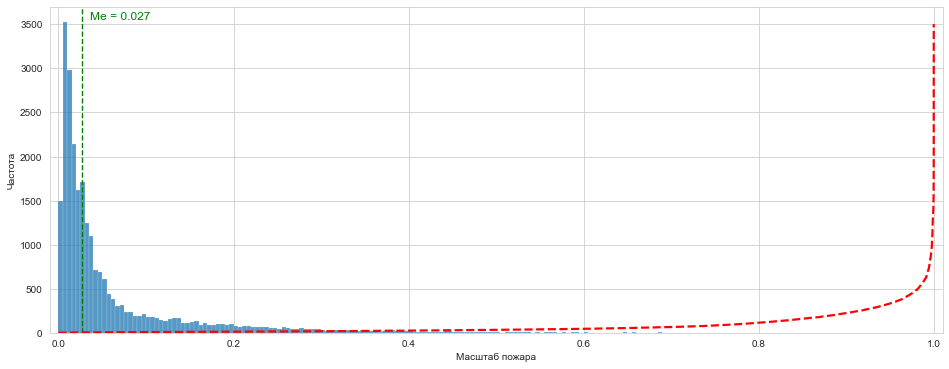

In [105]:
sns.set_style("whitegrid")  #  

fig, ax = plt.subplots(figsize = (16,6))
sns.histplot(df["S"], binwidth=0.005)
x = df['S'].median()
plt.axvline(x, color='green', linestyle='dashed', linewidth=1.4)
plt.text(x+0.01, 3550, 'Me = ' + str(round(x,3)), color='green', size=12)

m = df.index.max()
sns.lineplot(x=df.index/m, y=df['S']*1268, color='red', linewidth=2.2, linestyle='dashed')
             
ax.set(xlim = [-0.01, 1.01])
ax.set_ylabel('Частота', size=10)
ax.set_xlabel('Масштаб пожара', size=10)

fig.savefig('img/Masht', dpi=300, bbox_inches = 'tight')

In [99]:
df['S'].max()

2.761904761904762

<AxesSubplot:ylabel='S'>

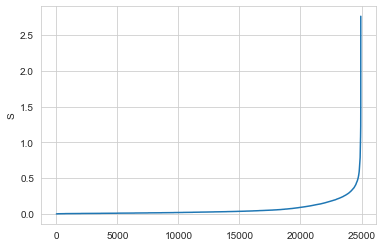

In [84]:

sns.lineplot(data=dfs, x=dfs.index, y='S')